<a href="https://colab.research.google.com/github/santiagonajera/optimizacionInventrios/blob/main/clasificacionXYZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasificación XYZ Detallada:
      Ítem  Coeficiente de Variación Clasificación XYZ
7   ITEM 8                  0.201764                 X
0   ITEM 1                  0.206895                 X
1   ITEM 2                  0.209825                 X
9  ITEM 10                  0.209930                 Y
3   ITEM 4                  0.210591                 Y
6   ITEM 7                  0.218970                 Y
8   ITEM 9                  0.223381                 Y
5   ITEM 6                  0.224865                 Z
2   ITEM 3                  0.225422                 Z
4   ITEM 5                  0.231029                 Z


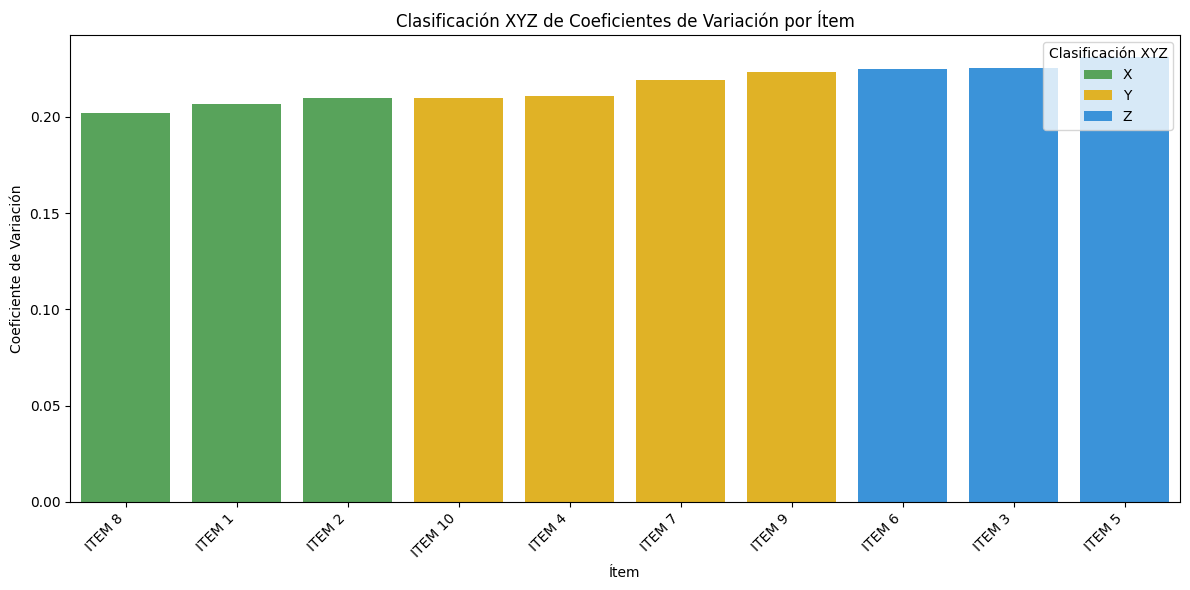

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo desde GitHub
file_path = 'https://github.com/santiagonajera/optimizacionInventrios/raw/refs/heads/main/EjemploClases-Eco.xlsx'

# Cargar la hoja 'Historico'
historical_data = pd.read_excel(file_path, sheet_name='Historico')

# Asegurar consistencia en nombres de columnas
historical_data.rename(columns={"ITEM": "Ítem"}, inplace=True)

# Extraer los últimos 18 meses de ventas para cada ítem
last_18_months = historical_data.iloc[:, -18:]
historical_data["Coeficiente de Variación"] = last_18_months.std(axis=1) / last_18_months.mean(axis=1)

# Clasificar los ítems según el coeficiente de variación (Clasificación XYZ)
historical_data = historical_data.sort_values(by="Coeficiente de Variación")
percentiles = historical_data["Coeficiente de Variación"].quantile([0.33, 0.77]).values

conditions = [
    (historical_data["Coeficiente de Variación"] <= percentiles[0]),
    (historical_data["Coeficiente de Variación"] > percentiles[0]) &
    (historical_data["Coeficiente de Variación"] <= percentiles[1]),
    (historical_data["Coeficiente de Variación"] > percentiles[1])
]
categories = ["X", "Y", "Z"]
historical_data["Clasificación XYZ"] = np.select(conditions, categories)

# Crear el DataFrame resultante con información relevante
result_df = historical_data[["Ítem", "Coeficiente de Variación", "Clasificación XYZ"]]

# Mostrar el DataFrame
print("Clasificación XYZ Detallada:")
print(result_df)

# Graficar la clasificación XYZ
plt.figure(figsize=(12, 6))
sns.barplot(data=historical_data, x="Ítem", y="Coeficiente de Variación", hue="Clasificación XYZ", dodge=False, palette=['#4CAF50', '#FFC107', '#2196F3'])
plt.title("Clasificación XYZ de Coeficientes de Variación por Ítem")
plt.xlabel("Ítem")
plt.ylabel("Coeficiente de Variación")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Clasificación XYZ")
plt.tight_layout()
plt.show()
